In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datasets import load_dataset
import ast
import matplotlib.ticker as ticker
import seaborn as sns
from adjustText import adjust_text
import matplotlib.colors as mcolors


c:\Users\anmol\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = pd.read_pickle('datasets/ds_cleaned_2')

In [3]:
ds = ds.drop('job_type_skills_copy' , axis=1)


In [4]:
ds.to_pickle('data_graphs/DA_DS_DE_skills_occurance_likelyhood')

In [5]:
DA = ds[ds['job_title_short']=='Data Analyst']
total_DA_jobs =DA['job_title_short'].count()
DA_exploded = DA.explode('job_skills_copy')
DA_exploded.drop_duplicates(inplace=True)
DA_exploded_2 = DA_exploded.groupby('job_skills_copy')['job_title_short'].count()
DA_exploded_3 = DA_exploded_2.sort_values(ascending=False).head(5).to_frame()
DA_exploded_3.reset_index(inplace=True)
DA_exploded_3['job_title_short'] = DA_exploded_3['job_title_short'] * 100 /total_DA_jobs
DA_exploded_3

,job_skills_copy,job_title_short
0,sql,47.123693
1,excel,34.093854
2,python,29.160418
3,tableau,23.686305
4,power bi,20.080592


In [6]:
DE = ds[ds['job_title_short']=='Data Engineer']
total_DE_jobs =DE['job_title_short'].count()
DE_exploded = DE.explode('job_skills_copy')
DE_exploded.drop_duplicates(inplace=True)
DE_exploded_2 = DE_exploded.groupby('job_skills_copy')['job_title_short'].count()
DE_exploded_3 = DE_exploded_2.sort_values(ascending=False).head(5).to_frame()
DE_exploded_3.reset_index(inplace=True)
DE_exploded_3['job_title_short'] = DE_exploded_3['job_title_short'] * 100 /total_DE_jobs
DE_exploded_3

,job_skills_copy,job_title_short
0,sql,60.714976
1,python,57.974610
2,aws,33.309168
3,azure,32.573463
4,spark,28.803110


In [7]:
DS = ds[ds['job_title_short']=='Data Scientist']
total_DS_jobs =DS['job_title_short'].count()
DS_exploded = DS.explode('job_skills_copy')
DS_exploded.drop_duplicates(inplace=True)
DS_exploded_2 = DS_exploded.groupby('job_skills_copy')['job_title_short'].count()
DS_exploded_3 = DS_exploded_2.sort_values(ascending=False).head(5).to_frame()
DS_exploded_3.reset_index(inplace=True)
DS_exploded_3['job_title_short'] = DS_exploded_3['job_title_short'] * 100 /total_DS_jobs
DS_exploded_3

,job_skills_copy,job_title_short
0,python,65.960769
1,sql,45.821215
2,r,34.562849
3,tableau,17.087245
4,aws,15.237747


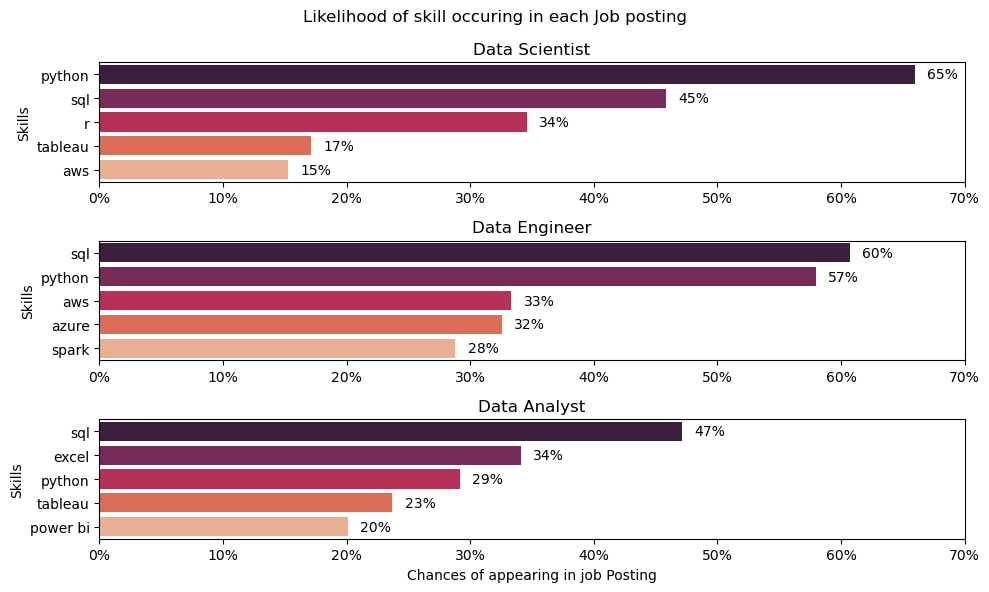

In [25]:
fig , ax = plt.subplots(3,1 , figsize=(10,6))
fig.suptitle('Likelihood of skill occuring in each Job posting')

sns.barplot(DS_exploded_3 , x='job_title_short' , y='job_skills_copy' , ax=ax[0] , hue='job_skills_copy' , palette='rocket')
ax[0].set_title("Data Scientist")
ax[0].set_ylabel('Skills')
ax[0].set_xlabel('')
ax[0].set_xlim(0,70)
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x , pos:f'{int(x)}%'))
for i , value in enumerate(DS_exploded_3['job_title_short']):
    ax[0].text( value + 1 , i , f'{int(value)}%' , va='center')

sns.barplot(DE_exploded_3 , x='job_title_short' , y='job_skills_copy' , ax=ax[1] ,hue='job_skills_copy' , palette='rocket')
ax[1].set_title("Data Engineer")
ax[1].set_ylabel('Skills')
ax[1].set_xlabel('')
ax[1].set_xlim(0,70)
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x , pos:f'{int(x)}%'))
for i , value in enumerate(DE_exploded_3['job_title_short']):
    ax[1].text( value + 1 , i , f'{int(value)}%' , va='center')

sns.barplot(DA_exploded_3 , x='job_title_short' , y='job_skills_copy' , ax=ax[2] , hue='job_skills_copy' ,palette='rocket' )
ax[2].set_title("Data Analyst")
ax[2].set_ylabel('Skills')
ax[2].set_xlabel('Chances of appearing in job Posting')
ax[2].set_xlim(0,70)
ax[2].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x , pos:f'{int(x)}%'))

for i , value in enumerate(DA_exploded_3['job_title_short']):
    ax[2].text( value + 1 , i , f'{int(value)}%' , va='center')


norm = mcolors.Normalize(vmin=0, vmax=100)
plt.tight_layout()
